## welch's method

Trying out different parameters for welch's method

In [1]:
%matplotlib inline

import os
import scipy as sp
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from scipy import signal
from scipy import io

##### Import a channel of ECoG data

In [2]:
filename = 'emodat.mat'
filename = os.path.join('/Users/jorge/Dropbox/research/sandbox/voytek-tutorials/', filename)

data_file = sp.io.loadmat(filename)
srate = data_file['srate'][0][0]
data  = data_file['data'][0]

Length of data:   1476035
Sampling rate:    1017.25 Hz
Duration of data: 1451.00 seconds


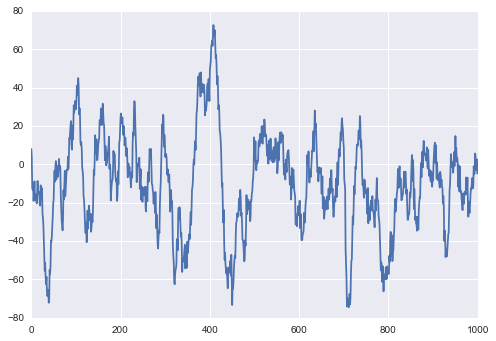

In [3]:
print("Length of data:   {}".format(len(data)))
print("Sampling rate:    {:.2f} Hz".format(np.squeeze(srate)))
print("Duration of data: {:.2f} seconds".format(len(data) / srate))
plt.plot(data[1000:2000]) # Let's plot about a second of the data

## overlapping and windows
When using Welch's method, we slide several windows across the signal to compute the FFT, and then average all of these together in order to reduce variance and achieve a smooth-looking PSD. Here's we'll see how the size of our window ($R$) influences the PSD. ($L$ is the length of the signal)

We'll be using a **Hamming** window. Let's see what happens when the $R = L$ **(No overlap).**

In [4]:
newsrate = 512
data = sp.signal.resample(data, int(np.floor(len(data)*(newsrate/srate))))

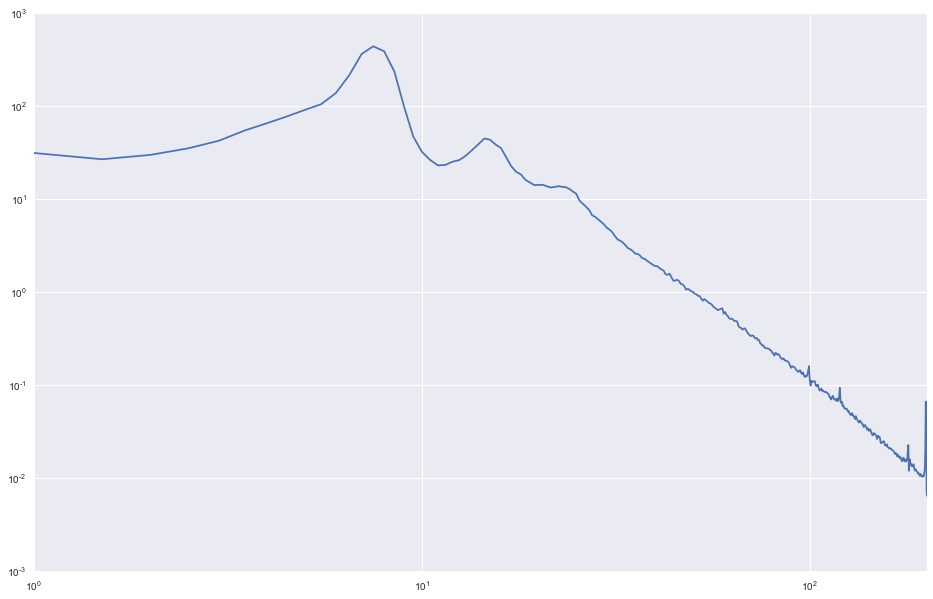

In [39]:
# freqs, PSD = sp.signal.welch(data, fs=512, window='hamming',
#                              noverlap=256//2, nfft=None, detrend='linear', 
#                              return_onesided=True, scaling='density')

f, psd = sp.signal.welch(data, fs=newsrate, nperseg=newsrate*2, window='hanning')

plt.figure(figsize=(16,10))
plt.xlim([1, 200])
plt.loglog(f, psd)

(1, 150)

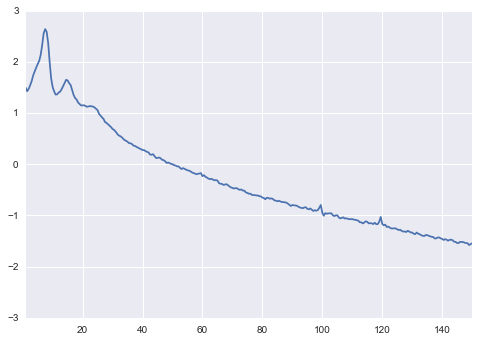

In [53]:
plt.plot(f, np.log10(psd))
plt.xlim([1,150])

In [ ]:
f, psd = sp.signal.welch(data, fs=newsrate, nperseg=newsrate)
plt.plot(f, psd)

In [ ]:
plt.loglog(f, psd)
plt.xlim([1, 150])

In [ ]:
srate = newsrate

In [56]:
a = np.arange(0, 40, 10)
print(a)

[ 0 10 20 30]


In [58]:
a = a[:, np.newaxis]
print(a)

[[[ 0]]

 [[10]]

 [[20]]

 [[30]]]
